<a href="https://colab.research.google.com/github/driisss/Intro-To-AI/blob/main/KNN_heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


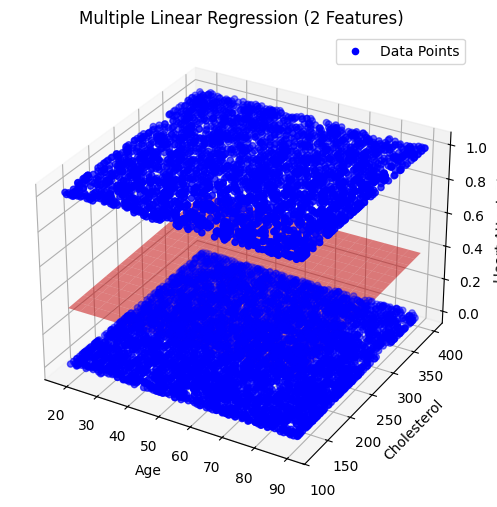

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load dataset
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv")

# Select and clean data
df = df[['Age', 'Cholesterol', 'Heart Attack Risk']].dropna()

# Prepare X and y
X = df[['Age', 'Cholesterol']]
y = df['Heart Attack Risk']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict plane for plotting
age_vals = np.linspace(X['Age'].min(), X['Age'].max(), 20)
chol_vals = np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), 20)
age_grid, chol_grid = np.meshgrid(age_vals, chol_vals)
Z = model.predict(np.c_[age_grid.ravel(), chol_grid.ravel()]).reshape(age_grid.shape)

# 3D Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Age'], X['Cholesterol'], y, c='blue', label='Data Points')
ax.plot_surface(age_grid, chol_grid, Z, alpha=0.5, color='red')
ax.set_xlabel("Age")
ax.set_ylabel("Cholesterol")
ax.set_zlabel("Heart Attack Risk")
ax.set_title("Multiple Linear Regression (2 Features)")
plt.legend()
plt.show()


In [ ]:
# Select features
features = ['Age', 'Cholesterol', 'Heart Rate', 'BMI', 'Triglycerides']

# Reload the dataset to ensure all columns are available for the second model
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv")

# Select the required columns and drop rows with missing values
df = df[features + ['Heart Attack Risk']].dropna()

# Train model
X = df[features]
y = df['Heart Attack Risk']
model = LinearRegression()
model.fit(X, y)

# Output beta values
print("Intercept:", model.intercept_)
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

# Predict sample values
sample = pd.DataFrame({
    'Age': [45, 60],
    'Cholesterol': [210, 330],
    'Heart Rate': [80, 95],
    'BMI': [28, 35],
    'Triglycerides': [250, 400]
})
predictions = model.predict(sample)
print("Predictions:", predictions)

Intercept: 0.3189147118983765
Age: 0.00014728119929373215
Cholesterol: 0.00011540560740274352
Heart Rate: -0.00010175206825152757
BMI: -1.6150607464076033e-05
Triglycerides: 2.2732179398171975e-05
Predictions: [0.34686821 0.36469659]
